In [2]:
# Importing the PIL library
from PIL import Image, ImageDraw, ImageFont
import time
import cv2
import numpy as np
from IPython import display
import glob
import os
import re


In [14]:
# Open an Image
img = Image.open('Images/Background_Screen.png')


FileNotFoundError: [Errno 2] No such file or directory: 'Images/Background_Screen.png'

In [ ]:
# Call draw Method to add 2D graphics in an image
I1 = ImageDraw.Draw(img)


In [ ]:
# Choose a font
font = ImageFont.truetype('Fonts/va-11-hall-a-6px-non-mono.ttf')
# font = ImageFont.truetype('Fonts/va-11-hall-a-6px.ttf')
# font = ImageFont.truetype('Fonts/va-11-hall-a-cyr-10px.ttf')

In [ ]:
x= 100
y= 200

# Add Text to an image
I1.text((x, y), "Bonjour, l'interview va commencer",font=font )


In [ ]:
def write_text(text, x, y, pathFont, sizeFont=None):
    if sizeFont : 
        font = ImageFont.truetype(pathFont, sizeFont)
    else:
        font = ImageFont.truetype(pathFont)
    I1.text((x, y), text, font=font)

In [7]:
write_text("Bonjour, l'interview va commencer", 100, 220, 'Fonts/va-11-hall-a-6px.ttf')
write_text("Bonjour, l'interview va commencer", 100, 240, 'Fonts/va-11-hall-a-cyr-10px.ttf')

NameError: name 'write_text' is not defined

In [ ]:
# Display edited image
img.show()


In [ ]:
def writeLetterByLetter(text, x, y, pathFont, timeToDisplay, sizeFont=None):
    timeToDisplay = timeToDisplay/len(text)
    img.save(f'Results/{0}.png')
    for i, letter in enumerate(text):
        write_text(letter, x, y, pathFont, sizeFont)
        x += 5
        display.display(img)
        img.save(f'Results/{i+1}.png')
        time.sleep(timeToDisplay)
        display.clear_output(wait=True)
        


In [ ]:
def imagesToVideo(pathImages, pathVideo, fps):
    img_array = []
    for filename in sorted(glob.glob(pathImages), key=os.path.getmtime):
        print(filename)
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        img_array.append(img)
    out = cv2.VideoWriter(pathVideo,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
    for i in img_array :
        out.write(i)
    out.release()

In [ ]:
img = Image.open('Images/Background_Screen.png')
I1 = ImageDraw.Draw(img)
writeLetterByLetter("Bonjour, l'interview va commencer", 100, 230, 'Fonts/va-11-hall-a-6px.ttf' , 0.1)

In [ ]:
# use imagesToVideo to create a vide
imagesToVideo('Results/*.png', 'Results/Video.mp4', 10)


Results\0.png
Results\1.png
Results\2.png
Results\3.png
Results\4.png
Results\5.png
Results\6.png
Results\7.png
Results\8.png
Results\9.png
Results\10.png
Results\11.png
Results\12.png
Results\13.png
Results\14.png
Results\15.png
Results\16.png
Results\17.png
Results\18.png
Results\19.png
Results\20.png
Results\21.png
Results\22.png
Results\23.png
Results\24.png
Results\25.png
Results\26.png
Results\27.png
Results\28.png
Results\29.png
Results\30.png
Results\31.png
Results\32.png
Results\33.png


In [ ]:
def writeLetterByLetterOnArray(text, x, y, pathFont, sizeFont=None):
    array_img = []
    for i, letter in enumerate(text):
        write_text(letter, x, y, pathFont, sizeFont)
        x += 5
        # transform image to cv2 format
        array_img.append(np.array(img))
    return array_img

In [ ]:
img = Image.open('Images/Background_Screen.png')
I1 = ImageDraw.Draw(img)
array_img = writeLetterByLetterOnArray("Bonjour, l'interview va commencer", 100, 230, 'Fonts/va-11-hall-a-6px.ttf')


In [5]:
# get dialogues 
DIALOGUES_PATH = 'Dialogues'
with open(os.path.join(DIALOGUES_PATH, 'test.csv'), 'r', encoding='utf-8') as f:
    all = f.read()
    lines = all.split('\n')

Dialogue = [line.split(',') for line in lines]
Dialogue

script = [re.split(r',(?=")', line) for line in all.split('\n')]
script


[['BackgroundImage:Background_Screen,DefaultTimeToDisplay:5,MainImage:Gillian:main,MainImage:Jill:main'],
 ['Gillian', '"Bonjour, je m\'appelle Gillian et vous ?",time:8'],
 ['Jill', '"Bonjour, Gillian, je m\'appelle Jill."'],
 ['Gillian', '"Enchanté de faire votre connaissance Jill."'],
 ['Jill', '"Enchanté de faire votre connaissance Gillian.",time:4'],
 ['Gillian', '"Comment allez-vous Jill ?"']]

In [ ]:
class Variation :
    def __init__(self, pathToAssets, x, y):
        self.VariationsImages = {}
        self.pathToAssets = pathToAssets
        self.x = x
        self.y = y

    def addVariation(self, name):
        try : 
            self.VariationsImages[name] = Image.open(os.path.join(self.pathToAssets, f'{name}.png'))
        except FileNotFoundError:
            self.VariationsImages[name] = None

            

In [ ]:
class Character :
    path_assets = os.path.join('Assets', 'Characters')
    mainImages = {}
    bodyPartVariantesImages = {}
    imageConsructor = None

    def __init__(self, name, firstMainImageName = None):
        self.name = name
        self._path_assets = os.path.join(self._path_assets, f'{name}')
        if firstMainImageName:
            self.addMainImage(firstMainImageName)
            self.principaleImage = firstMainImageName
        
    
    def addMainImage(self, image_name):
        if image_name not in self.mainImages:
            try : 
                self.mainImages[image_name] = Image.open(os.path.join(self.path_assets, f'{image_name}.png'))
            except FileNotFoundError:
                self.mainImages[image_name] = None
        return self.mainImages[image_name]
    
    def addBodyPartVariantes(self, variantesName, x, y, pathToAssets):
        if variantesName not in self.bodyPartVariantesImages:
            pathToAssets = os.path.join(self.path_assets, pathToAssets)
            self.bodyPartVariantesImages[variantesName] = Variations(variantesName, pathToAssets)

    def addVariation(self, name, variationName):
        if name in self.bodyPartVariantesImages:
            self.bodyPartVariantesImages[name].addVariation(variationName)
        else:
            raise Exception(f'Variation {name} does not exist')
        
    def createCharacterImage(self, mainImageName, bodyPartVariantes):
        if mainImageName in self.mainImages:
            img = self.mainImages[mainImageName]
            I1 = ImageDraw.Draw(img)
            for bodyPart, variation in bodyPartVariantes.items():
                if bodyPart in self.bodyPartVariantesImages:
                    if variation in self.bodyPartVariantesImages[bodyPart].VariationsImages:
                        img.paste(self.bodyPartVariantesImages[bodyPart].VariationsImages[variation], (self.bodyPartVariantesImages[bodyPart].x, self.bodyPartVariantesImages[bodyPart].y), self.bodyPartVariantesImages[bodyPart].VariationsImages[variation])
            return img
        else:
            raise Exception(f'Main image {mainImageName} does not exist')


In [15]:
class Dialogue :
    """
    This class is a iterable object 
    This class receive a script, the script is a string of lines with the following format :
    The first line is a header line, the header contains different parameters :
    - MainImage:NameOfCharacter:NameOfMainImage
    - DefaultTimeToDisplay:Time
    - BackgroundImage:NameOfBackgroundImage
    - VariationCoordinates:NameOfCharacter:NameOfBodyPart:Coordinates:path -> Coordinates format is "x,y", quotes are important, path is optional

    "CharacterName,Text and optional parameters"
    - The CharacterName is the name of the character
    - The Text is the text to display, is under quotes
    - The TimeToDisplay is the time to display the text, is optional
    - The MainImageName is the name of the main image of the character, is optional
    - The BodyPartVariantesName is the name of the body part variete image of the character, is optional

    The format of optional parameters is :
    - time:TimeToDisplay 
    - main:MainImageName
    - body:BodyPartVarianteName

    The result of the each iteration is a tuple of 4 elements :
    - The first element is the character name
    - The second element is the text to display
    - The third element is a image of the character
    - The fourth element is the time to display the text
    """

    characters = {}
    defaultTimeToDisplay = 0.5
    
    def __iter__(self, script):
        self.script = [re.split(r',(?=")', line) for line in script.split('\n')]
        self.getScriptParemeters()
        self.script.pop(0)
        return self

    def __next__(self):
        for line in script :
            if line[0] == '' : continue
            CharacterName, Text, *optionalParameters = line
            Text = Text[1:-1] # remove quotes
            if CharacterName not in self.characters:
                self.characters[CharacterName] = Character(CharacterName)
            mainImageName = self.characters[CharacterName].principaleImage
            bodyPartVariante = []
            timeToDisplay = self.defaultTimeToDisplay
            for i in optionalParameters :
                if i.startswith('time'):
                    timeToDisplay = float(i.split(':')[1])
                elif i.startswith('main'):
                    mainImageName = i.split(':')[1]
                elif i.startswith('body'):
                    bodyPartVariante.append(i.split(':')[1])
            finalImage = self.characters[CharacterName].createCharacterImage(mainImageName, bodyPartVariante)
            return CharacterName, Text, finalImage, timeToDisplay
        raise StopIteration
    
    def getScriptParemeters(self):
        for parameters in self.script[0] :
            if parameters == '' : continue
            elif parameters.startswith('MainImage'):
                splitParameters = parameters.split(':')
                if len(splitParameters) != 3 : continue
                self.characters[splitParameters[1]] = Character(splitParameters[1], splitParameters[2])
            elif parameters.startswith('DefaultTimeToDisplay'):
                splitParameters = parameters.split(':')
                if len(splitParameters) != 2 : continue
                self.defaultTimeToDisplay = float(splitParameters[1])
            elif parameters.startswith('BackgroundImage'):
                splitParameters = parameters.split(':')
                if len(splitParameters) != 2 : continue
                self.backgroundImage = splitParameters[1]
            elif parameters.startswith('VariationCoordinates'):
                splitParameters = parameters.split(':')
                if len(splitParameters) >= 4 and len(splitParameters) <= 5: continue
                if splitParameters[1] not in self.characters:
                    self.characters[splitParameters[1]] = Character(splitParameters[1])
                path = None
                if len(splitParameters) == 5:
                    path = splitParameters[4]
                x, y = splitParameters[3].split(',')
                self.characters[splitParameters[1]].addBodyPartVariantes(splitParameters[2], x, y, path)


    

In [16]:
class CreatePicture :
    
    def __init__(self, path) :
        self.pathToAssets = path


    def insertImage(self, imageToModify,imageToInsert, x, y):
        imageToModify.paste(imageToInsert, (x, y), imageToInsert)
        return imageToModify
    
    

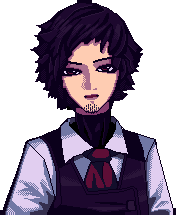

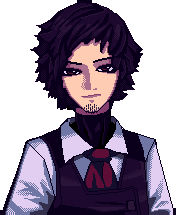

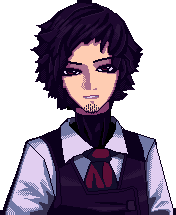

In [23]:
imageGill = Image.open(os.path.join("assets", "Characters", "Gillian", "main.png"))
mouthOpen = Image.open(os.path.join("assets", "Characters", "Gillian", "mouth", "Open.png"))
mouthClose = Image.open(os.path.join("assets", "Characters", "Gillian", "mouth", "Close.png"))
mouthSemi_close = Image.open(os.path.join("assets", "Characters", "Gillian", "mouth", "Semi_close.png"))
imageGill.paste(mouthOpen, (63, 83), mouthOpen)
display.display(imageGill)
imageGill.paste(mouthClose, (63, 83), mouthClose)
display.display(imageGill)
imageGill.paste(mouthSemi_close, (63, 83), mouthSemi_close)
display.display(imageGill)
# imageGill.show()